# DAT210x - Programming with Python for DS

## Module5- Lab5

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from sklearn import preprocessing 
matplotlib.style.use('ggplot') # Look Pretty

### A Convenience Function

In [291]:
def plotDecisionBoundary(model, X, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    padding = 0.6
    resolution = 0.0025
    colors = ['royalblue','forestgreen','ghostwhite']

    # Calculate the boundaris
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # Create a 2D Grid Matrix. The values stored in the matrix
    # are the predictions of the class at at said location
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

    # What class does the classifier say?
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour map
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)

    # Plot the test original points as well...
    for label in range(len(np.unique(y))):
        indices = np.where(y == label)
        plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], label=str(label), alpha=0.8)

    p = model.get_params()
    plt.axis('tight')
    plt.title('K = ' + str(p['n_neighbors']))

### The Assignment

Load up the dataset into a variable called `X`. Check `.head` and `dtypes` to make sure you're loading your data properly--don't fail on the 1st step!

In [292]:
# .. your code here ..
X=pd.read_csv('Datasets/wheat.data',index_col=0)
X.head()

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [293]:
X.describe()

,area,perimeter,compactness,length,width,asymmetry,groove
count,210.000000,210.000000,207.000000,210.000000,209.000000,210.000000,206.000000
mean,14.847524,14.559286,0.871280,5.563918,3.281440,3.693530,5.407529
std,2.909699,1.305959,0.023306,0.719594,0.419907,1.495112,0.532330
min,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,3.485000
25%,12.270000,13.450000,0.857700,5.244750,2.956000,2.600250,5.045000
50%,14.355000,14.320000,0.873500,5.518000,3.245000,3.599000,5.226000
75%,17.305000,15.715000,0.887650,5.979750,3.566000,4.768750,5.879000
max,21.180000,17.250000,0.918300,6.675000,5.325000,8.456000,6.735000


Copy the `wheat_type` series slice out of `X`, and into a series called `y`. Then drop the original `wheat_type` column from the `X`:

In [294]:
# .. your code here ..
y = X['wheat_type']
X.drop(columns='wheat_type',inplace=True)

Histogram Chart for Category: area


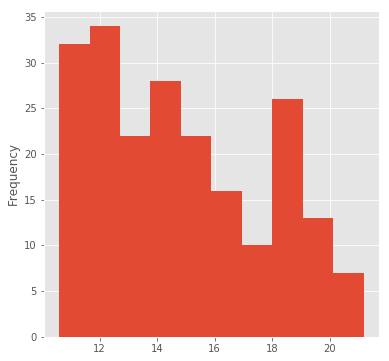

Histogram Chart for Category: perimeter


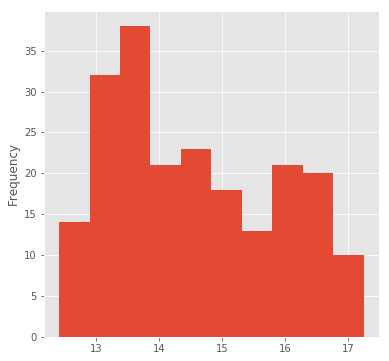

Histogram Chart for Category: compactness


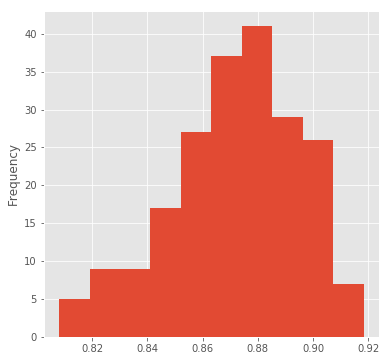

Histogram Chart for Category: length


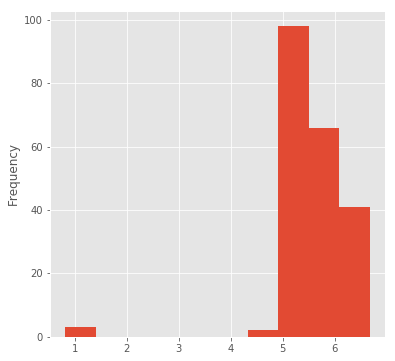

Histogram Chart for Category: width


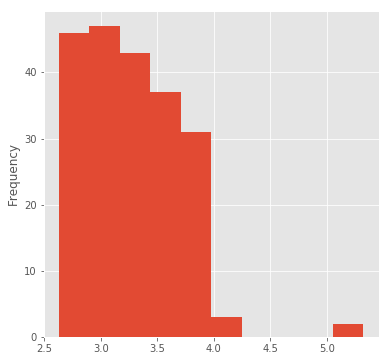

Histogram Chart for Category: asymmetry


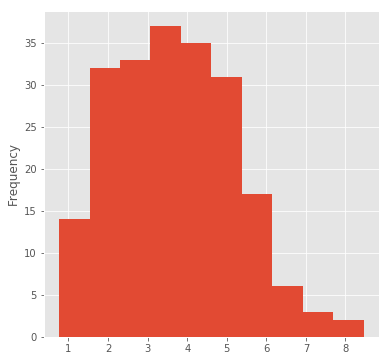

Histogram Chart for Category: groove


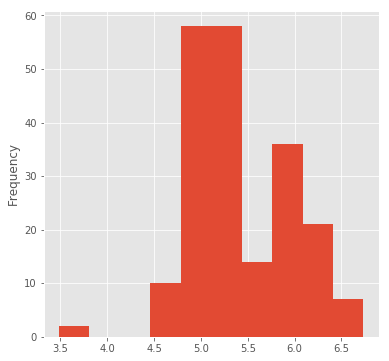

In [286]:
# Distribution of All X Features
z = X.columns
for i in range(0,len(z)):
    col =X.columns[i]
    print("Histogram Chart for Category:",col)
    fig = plt.figure(figsize=(6,6))
    ax=fig.gca()
    X[col].plot.hist(ax=ax,bins=10)
    plt.show()

Do a quick, "ordinal" conversion of `y`. In actuality our classification isn't ordinal, but just as an experiment...

In [287]:
# .. your code here ..
y = y.astype(dtype="category",ordered=True)
y = y.cat.codes
## Dummy variable Encoding
y2 = pd.get_dummies(y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


Do some basic nan munging. Fill each row's nans with the mean of the feature:

In [300]:
# .. your code here ..
X = X.fillna(X.mean())

Split `X` into training and testing data sets using `train_test_split()`. Use `0.33` test size, and use `random_state=1`. This is important so that your answers are verifiable. In the real world, you wouldn't specify a random_state:

In [258]:
# .. your code here ..
X_train,X_test= train_test_split(X,test_size=0.33,random_state=1)
y_train,y_test= train_test_split(y,test_size=0.33,random_state=1)

Create an instance of SKLearn's Normalizer class and then train it using its .fit() method against your _training_ data. The reason you only fit against your training data is because in a real-world situation, you'll only have your training data to train with! In this lab setting, you have both train+test data; but in the wild, you'll only have your training data, and then unlabeled data you want to apply your models to.

In [259]:
# .. your code here ..
T_train = preprocessing.StandardScaler().fit_transform(X_train)
T_train_norm = preprocessing.Normalizer().fit_transform(X_train)
T_train_minmax = preprocessing.MinMaxScaler().fit_transform(X_train)

With your trained pre-processor, transform both your training AND testing data. Any testing data has to be transformed with your preprocessor that has ben fit against your training data, so that it exist in the same feature-space as the original data used to train your models.

In [260]:
# .. your code here ..
T_test = preprocessing.StandardScaler().fit_transform(X_test)
T_test_norm = preprocessing.Normalizer().fit_transform(X_test)
T_test_minmax = preprocessing.MinMaxScaler().fit_transform(X_test)

In [261]:
T_train[0]

array([-0.85964757, -0.87965511, -0.32148966, -0.43408334, -0.80481826,
        0.50217546, -0.86078182])

In [262]:
T_train_norm[0]

array([0.61015391, 0.65753976, 0.04229554, 0.25730029, 0.14494209,
       0.21597201, 0.24435467])

In [263]:
T_train_minmax[0]

array([0.18304432, 0.21694215, 0.56183057, 0.75956695, 0.11916324,
       0.47535399, 0.46079652])

In [264]:
X_train.iloc[0,:]

area           12.4900
perimeter      13.4600
compactness     0.8658
length          5.2670
width           2.9670
asymmetry       4.4210
groove          5.0020
Name: 147, dtype: float64

Just like your preprocessing transformation, create a PCA transformation as well. Fit it against your training data, and then project your training and testing features into PCA space using the PCA model's `.transform()` method. This has to be done because the only way to visualize the decision boundary in 2D would be if your KNN algo ran in 2D as well:

In [265]:
# .. your code here ..
model = PCA(n_components=2,svd_solver='auto')
model.fit(T_train)
X_train = model.transform(T_train)
X_test = model.transform(T_test)

In [266]:
X_test.shape

(70, 2)

Create and train a KNeighborsClassifier. Start with `K=9` neighbors. Be sure train your classifier against the pre-processed, PCA- transformed training data above! You do not, of course, need to transform your labels.

In [267]:
# .. your code here ..
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
knn.predict(X_test)

array([1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 1, 0, 2, 0,
       2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0,
       1, 0, 1, 2], dtype=int8)

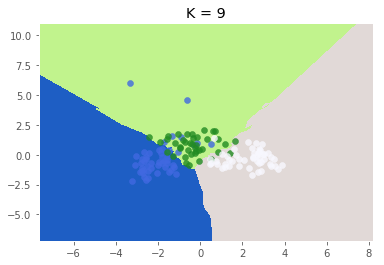

In [268]:
# I hope your KNeighbors classifier model from earlier was named 'knn'
# If not, adjust the following line:
plotDecisionBoundary(knn, X_train, y_train)

Display the accuracy score of your test data/labels, computed by your KNeighbors model. You do NOT have to run `.predict` before calling `.score`, since `.score` will take care of running your predictions for you automatically.

In [269]:
# .. your code here ..
knn.score(X_test,y_test)

0.9285714285714286

***

## ** TEST ACCURACY FOR DIFFERENT KNN NEIGHBOR INPUT ** 

In [270]:
#get_inp = input("Enter which scaler to use(1-Standard, 2-Normalizer, 3-MinMax:")
#print(get_inp)
score_set=[]
normalizer_type=['No','Standard','Normalizer','MinMax']
X_train,X_test= train_test_split(X,test_size=0.33,random_state=1)
y_train,y_test= train_test_split(y,test_size=0.33,random_state=1)
name=[]
noofk=[]
for j in normalizer_type:
    for i in range(0,11):
        if (j=='No'):
            print('--Running KNN with No Scaling---')
            model = PCA(n_components=2,svd_solver='auto')
            model.fit(T_train)
            X_train = model.transform(T_train)
            X_test = model.transform(T_test)
        else:
            if(j =='Standard'):
                print('Running Standard Scaler --- KNN')
                T_train = preprocessing.StandardScaler().fit_transform(X_train)
                T_test = preprocessing.StandardScaler().fit_transform(X_test)
            elif(j =='Normalizer'):
                print('Running Normalizer Scaler --- KNN')
                T_train = preprocessing.Normalizer().fit_transform(X_train)
                T_test = preprocessing.Normalizer().fit_transform(X_test)
            else:
                print('Running MinMax Scaler --- KNN')
                T_train = preprocessing.MinMaxScaler().fit_transform(X_train)
                T_test = preprocessing.MinMaxScaler().fit_transform(X_test)
            model = PCA(n_components=2,svd_solver='auto')
            model.fit(T_train)
            X_train = model.transform(T_train)
            X_test = model.transform(T_test)
        knn = KNeighborsClassifier(n_neighbors=i+1)
        knn.fit(X_train,y_train)
        knn.predict(X_test)
        name.append(j)
        noofk.append(int(i+1))
        score_set.append(knn.score(X_test,y_test))
final_metrics =pd.DataFrame(np.column_stack([name,noofk,score_set]),columns=['Scaler_Type','Kvalues','Scores'])

--Running KNN with No Scaling---
--Running KNN with No Scaling---
--Running KNN with No Scaling---
--Running KNN with No Scaling---
--Running KNN with No Scaling---
--Running KNN with No Scaling---
--Running KNN with No Scaling---
--Running KNN with No Scaling---
--Running KNN with No Scaling---
--Running KNN with No Scaling---
--Running KNN with No Scaling---
Running Standard Scaler --- KNN
Running Standard Scaler --- KNN
Running Standard Scaler --- KNN
Running Standard Scaler --- KNN
Running Standard Scaler --- KNN
Running Standard Scaler --- KNN
Running Standard Scaler --- KNN
Running Standard Scaler --- KNN
Running Standard Scaler --- KNN
Running Standard Scaler --- KNN
Running Standard Scaler --- KNN
Running Normalizer Scaler --- KNN
Running Normalizer Scaler --- KNN
Running Normalizer Scaler --- KNN
Running Normalizer Scaler --- KNN
Running Normalizer Scaler --- KNN
Running Normalizer Scaler --- KNN
Running Normalizer Scaler --- KNN
Running Normalizer Scaler --- KNN
Running Norma

In [271]:
final_metrics['Kvalues']=pd.to_numeric(final_metrics.Kvalues,errors='coerce')
final_metrics['Scores']=pd.to_numeric(final_metrics.Scores,errors='coerce')

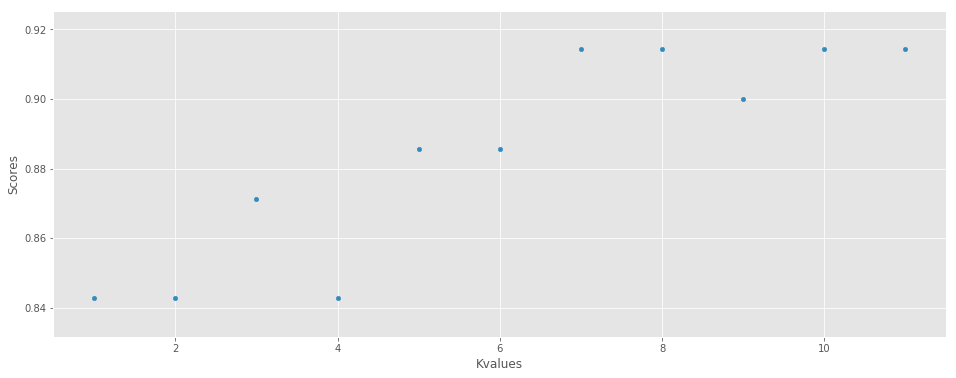

In [272]:
fig = plt.figure(figsize=(16,6))
ax=fig.gca()
final_metrics2=final_metrics[final_metrics.Scaler_Type=='Standard']
final_metrics2.plot(kind='scatter',x='Kvalues',y='Scores',ax=ax)

(11, 3)
(11, 3)
(11, 3)
(11, 3)


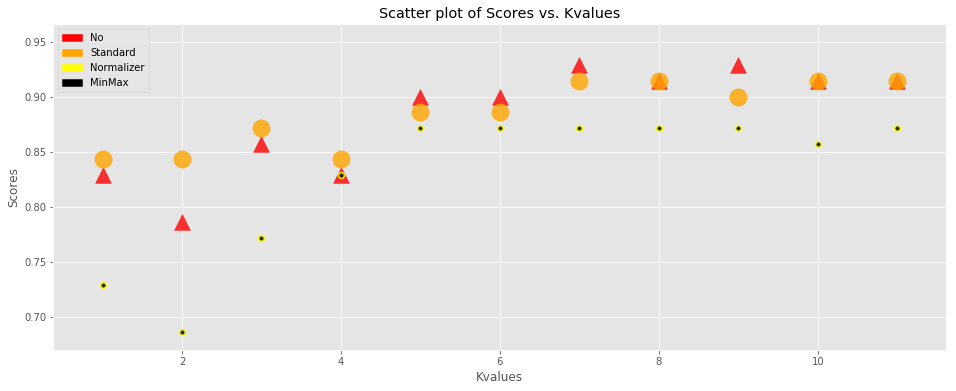

In [274]:
def auto_color(df,cols):
    for col in cols:
        fig=plt.figure(figsize=(16,6))
        ax=fig.gca()
        t1 = final_metrics.loc[final_metrics['Scaler_Type']=='No']
        t2 = final_metrics.loc[final_metrics['Scaler_Type']=='Standard']
        t3 = final_metrics.loc[final_metrics['Scaler_Type']=='Normalizer']
        t4 = final_metrics.loc[final_metrics['Scaler_Type']=='MinMax']
        if t1.shape[0] > 0:
            print(t1.shape)
            t1.plot(kind='scatter',x=col,y='Scores',ax=ax,color='Red',marker='^',alpha=0.8,s=250)
        if t2.shape[0] > 0:
            print(t2.shape)
            t2.plot(kind='scatter',x=col,y='Scores',ax=ax,color='Orange',marker='o',alpha=0.8,s=300)
        if t3.shape[0] > 0:
            print(t3.shape)
            t3.plot(kind='scatter',x=col,y='Scores',ax=ax,color='Yellow',marker='.',alpha=0.8,s=200)
        if t4.shape[0] > 0:
            print(t4.shape)
            t4.plot(kind='scatter',x=col,y='Scores',ax=ax,color='Black',marker='.',alpha=0.8,s=50)
        ax.set_title('Scatter plot of Scores vs. ' + col)
        red = mpatches.Patch(color='Red', label='No')
        orange = mpatches.Patch(color='Orange', label='Standard')
        blue = mpatches.Patch(color='Yellow', label='Normalizer')
        black = mpatches.Patch(color='Black', label='MinMax')
        plt.legend(handles=[red,orange,blue,black])
auto_color(final_metrics,['Kvalues'])

## **KNN on X_train and X_test without PCA**

In [275]:
X_train,X_test= train_test_split(X,test_size=0.33,random_state=1)
y_train,y_test= train_test_split(y,test_size=0.33,random_state=1)

In [276]:
for i in range(0,11):
    model=KNeighborsClassifier(n_neighbors=i+1)
    model.fit(X_train,y_train)
    print(i+1,model.score(X_test,y_test))

1 0.8714285714285714
2 0.8428571428571429
3 0.8714285714285714
4 0.8571428571428571
5 0.8714285714285714
6 0.8428571428571429
7 0.8571428571428571
8 0.8428571428571429
9 0.8714285714285714
10 0.8571428571428571
11 0.8714285714285714


In [277]:
model=KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8714285714285714

In [278]:
model.score(X_test,y_test)

0.8714285714285714

### Bonus

Instead of the ordinal conversion, try and get this assignment working with a proper Pandas get_dummies for feature encoding. You might have to update some of the `plotDecisionBoundary()` code.

In [297]:
y2 = pd.get_dummies(y)

In [308]:
y2.columns

Index(['canadian', 'kama', 'rosa'], dtype='object')

In [304]:
X_train,X_test= train_test_split(X,test_size=0.33,random_state=1)
y2_train,y2_test= train_test_split(y2,test_size=0.33,random_state=1)

In [305]:
T_train =preprocessing.Normalizer().fit_transform(X_train)
T_test = preprocessing.Normalizer().fit_transform(X_test)

In [306]:
pcamodel =PCA(n_components=2,svd_solver='full')
pcamodel.fit(T_train)
X_train=pcamodel.transform(T_train)
X_test =pcamodel.transform(T_test)

In [316]:
knn =KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y2_train)
knn.score(X_test,y2_test)

0.8571428571428571

In [319]:
outp = pd.DataFrame(knn.predict(X_test))

In [321]:
outp.columns =['canadian','kama','rosa']

In [324]:
y2_test[:5]

,canadian,kama,rosa
id,,,
44,0,1,0
188,1,0,0
51,0,1,0
204,1,0,0
35,1,0,0
